# Problema de Titanic


El famoso problema de TItanic consiste en, a partir de datos de los individuos involucrados en el accidente, predecir quienes se salvaron y quienes no.

En este notebook usaremos la libreria Titanic-Fairy para entrenar un modelo que pueda resolver el problema

# Datos

Los datos de la tabla que se usara de entrenamiento se puede resumir en la siguiente tabla 

| Column Name - customers.csv | Description |
|:--|:--|
| Survival | Survival (0 = No; 1 = Yes). Not included in test.csv file | 
| Pclass |  Ticket Class/ A Proxy for socio-economic status(SES) (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower) | 
| Name | Name |
| Sex | Sex |
| Age | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| Sibsp | Number of Siblings (brother, sister, stepbrother, stepsister) /Spouses (husband, wife (mistresses and fiancés were ignored)) Aboard |
| Parch | Number of Parents (mother, father)/Children (daughter, son, stepdaughter, stepson) Aboard; Some children travelled only with a nanny, therefore parch=0 for them. |
| Ticket | Ticket Number |
| Fare | Passenger Fare |
| Cabin | Cabin |
| Embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |

A continuacion veamos como se correlacionan algunas de estas variables

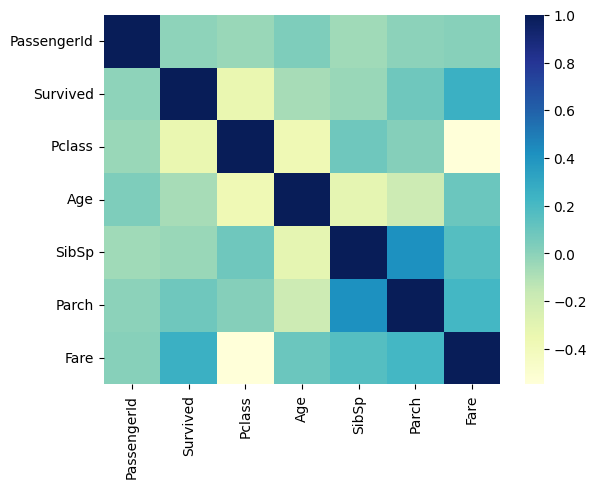

In [1]:
from titanic_fairy.helpers.load_and_save import Load
from titanic_fairy.helpers.train_test_split import stratified_split
from titanic_fairy.metrics.graphics import show_heatmap, check_train_test_split

titanic_raw_train = Load(train_path = "../dataset/train.csv")
show_heatmap(titanic_raw_train)

A primera vista, la clase y el precio del ticekt parecen influir en la supervivencia. No se ven efectos en la edad, pero esto puede deberse a un problema de escala de las variables. 

Con esto en mente reliazemos la separacion entre Train y Test. Consideramos la posibillidad de clases desbalanceadas, por lo tanto ocupamos una separacion estratificada en base a Sexo, Pclass y Supervivencia. 

En la siguiente grafica se observa que la separacion es efectivamente balanceada.


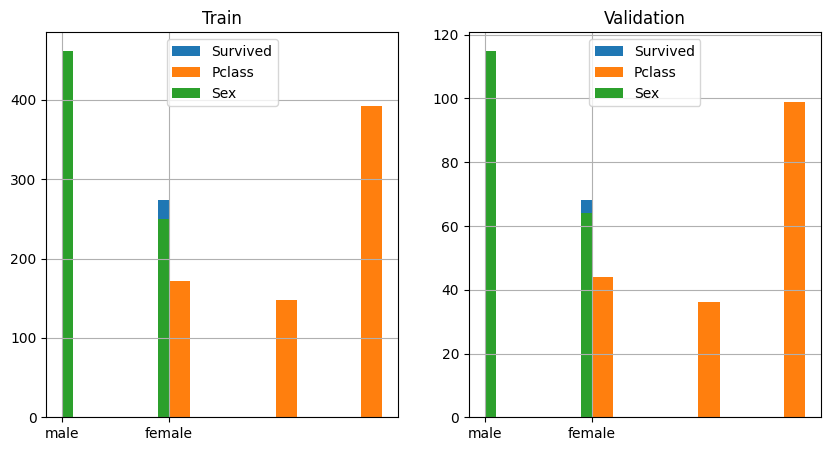

In [2]:
raw_train, raw_test = stratified_split(titanic_raw_train)

check_train_test_split(raw_train, raw_test)

# Preprocesamiento

Notemos lo siguiente

In [3]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 455 to 363
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [5]:
raw_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          548
Embarked         2
dtype: int64

El preprocesamiento se llevara a cabo en 3 fases:

- Imputacion

Hay valores nulos en edad, cabina y embarcacion.Imputaremos estos datos (Usando promedio y la moda). Ademas necesitamos codificar correctamente la cabina,  

- Codificacion

Embarked y Sex corresponden a variables categoricas. Usaremos One-Shot-Encoding para este proposito.

- Eliminacion

Notemos que los datos de Cabina falltantes representan mucho mas del 50% de los datos, por lo que conviene desecharlos realmente. Tambien desecharemos el ID, el nombre y el ticket. El nombre puede entregar alguna info ("Mr." o "Mrs." por ejemplo ) pero asumiremos que esta informacion ya esta dentro de las otras variables (Tarifa y sexo por ejemplo). 


Estos tres pasos se peuden realizar con el wrapper de preprocesamiento de la libreria


In [7]:
from titanic_fairy.preprocessing.preprocess import Preprocess

